Mean: -0.07923188805580139
Std Dev: 2.0404980182647705


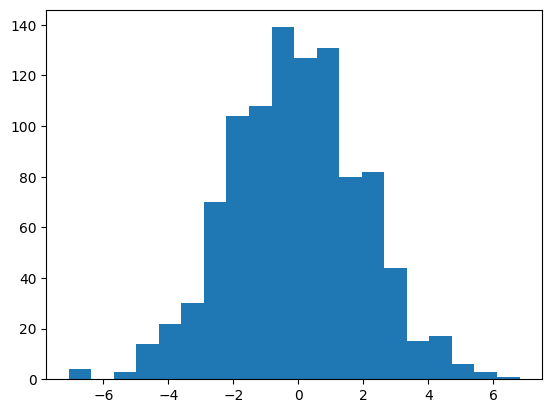

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

dtype = tf.float32 # Set the data type to float32

# Define the target distribution
target = tfd.Normal(loc=0., scale=1.)

# Define the bijector
bijector = tfb.Scale(scale=2.)

# Define the transformed distribution
transformed_distribution = tfd.TransformedDistribution(
    distribution=target,
    bijector=bijector
)

# Define the initial state
init_state = np.float32([1.])

# Define the number of samples to generate
num_samples = 1000

# Define the Markov chain Monte Carlo step size
step_size = 0.5

# Define the kernel function
unnormalized_kernel = lambda x: transformed_distribution.log_prob(x)
kernel = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=unnormalized_kernel,
    step_size=step_size,
    num_leapfrog_steps=3
)

# Define the Markov chain Monte Carlo sampler
sampler = tfp.mcmc.TransformedTransitionKernel(
    inner_kernel=kernel,
    bijector=bijector
)

# Define the initial state of the chain
state = tf.convert_to_tensor(init_state, dtype=dtype)

# Generate the Markov chain Monte Carlo samples
samples = tfp.mcmc.sample_chain(
    num_results=num_samples,
    current_state=state,
    kernel=sampler,
    num_burnin_steps=100,
    trace_fn=None
)

# Print the mean and standard deviation of the samples
print('Mean: {}'.format(tf.reduce_mean(samples).numpy()))
print('Std Dev: {}'.format(tf.math.reduce_std(samples).numpy()))

# Plot the samples
plt.hist(samples.numpy().flatten(), bins=20)
plt.show()


In [3]:
tf.__version__

'2.11.0'